In [ ]:
! pip install -q kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jotiradityasanger","key":"4a88fe5f5cd5639fdb46e752da546b71"}'}

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 2.56MB/s]


In [9]:
!unzip /content/customer-segmentation-tutorial-in-python.zip

Archive:  /content/customer-segmentation-tutorial-in-python.zip
  inflating: Mall_Customers.csv      


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df=pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
#Customer id is not required
df=df.drop(columns=['CustomerID'],axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


Understanding Data

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


<Axes: ylabel='Age'>

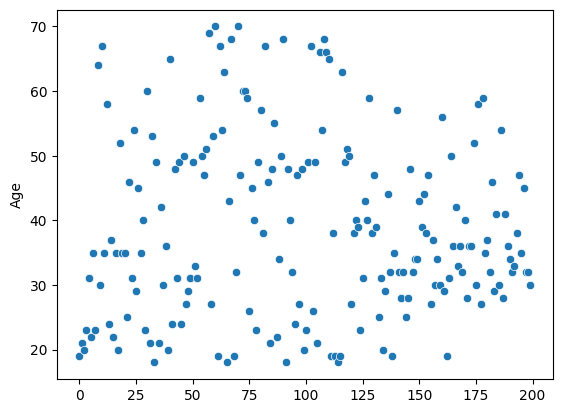

In [14]:
sns.scatterplot(df.Age)

<Axes: ylabel='Gender'>

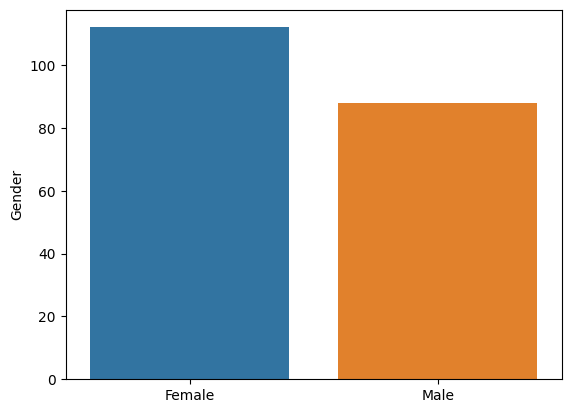

In [15]:
sns.barplot(x=df.Gender.value_counts().index,y=df.Gender.value_counts())

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

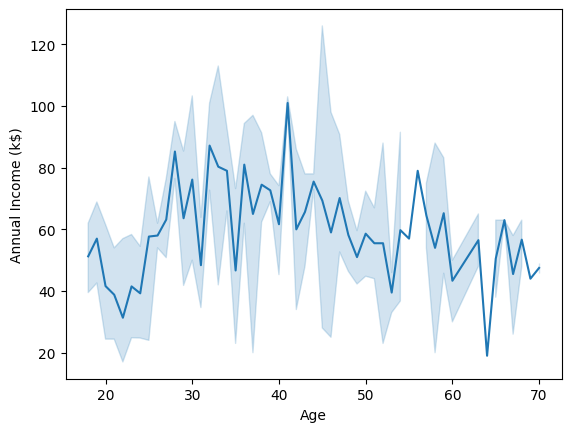

In [16]:
sns.lineplot(x=df.Age,y=df['Annual Income (k$)'])

<ipython-input-17-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

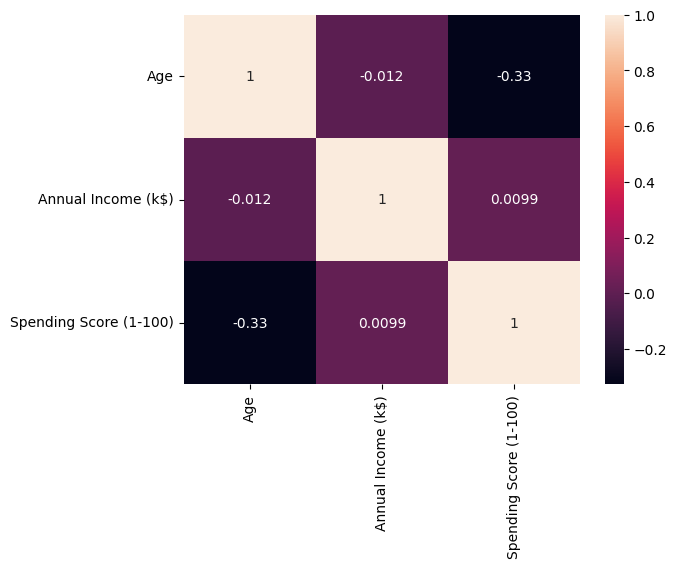

In [17]:
sns.heatmap(df.corr(),annot=True)

Preprocessing

In [18]:
#Checking for Null Values
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [19]:
#Spliting Data
new_df=df.iloc[:,:-1]
new_df.head()

,Gender,Age,Annual Income (k$)
0,Male,19,15
1,Male,21,15
2,Female,20,16
3,Female,23,16
4,Female,31,17


In [20]:
#Performing Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
new_df.Gender=le.fit_transform(new_df.Gender)
new_df.head()

,Gender,Age,Annual Income (k$)
0,1,19,15
1,1,21,15
2,0,20,16
3,0,23,16
4,0,31,17


<Axes: >

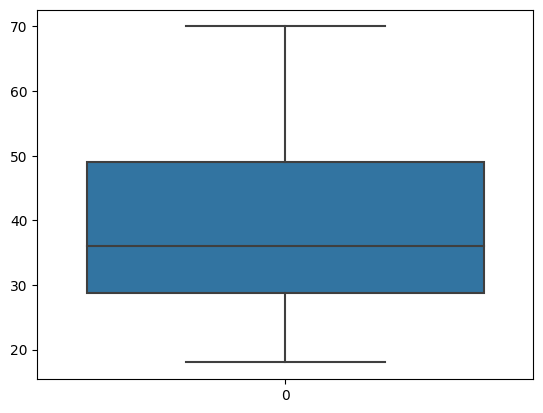

In [21]:
#Checking for Outliers for Age
sns.boxplot(new_df.Age)

<Axes: >

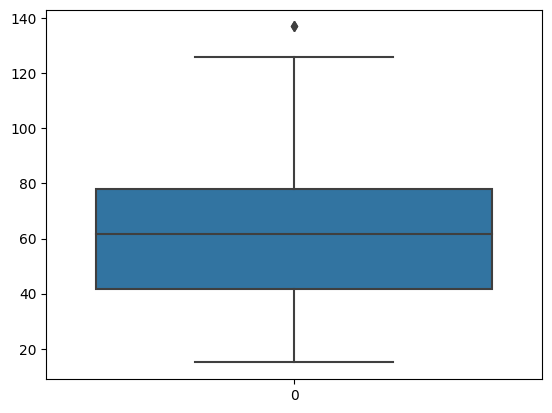

In [22]:
#Checking for Outliers for Annual Income (k$)
sns.boxplot(new_df['Annual Income (k$)'])

In [23]:
#Replacing Outlier
q1=new_df['Annual Income (k$)'].quantile(0.25)
q3=new_df['Annual Income (k$)'].quantile(0.75)
IQR=q3-q1
Upper=IQR*1.5+q3
Lower=q1-IQR*1.5
new_df['Annual Income (k$)']=np.where(new_df['Annual Income (k$)']>Upper,new_df['Annual Income (k$)'].median(),new_df['Annual Income (k$)'])

<Axes: >

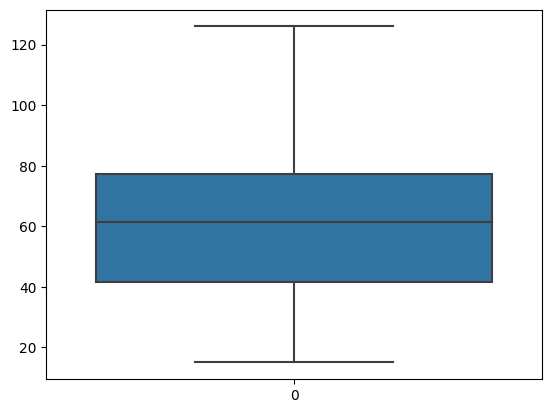

In [24]:
sns.boxplot(new_df['Annual Income (k$)'])

Model Building

In [25]:
from sklearn import cluster

In [26]:
error=[]
for i in range(1,11):
  kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(new_df)
  error.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [27]:
error

[164359.67499999996,
 81034.20067820631,
 54327.95595202399,
 36963.658607350095,
 29943.015021645027,
 23716.791456359257,
 20690.55822218927,
 17764.854949296823,
 15048.03495770057,
 13319.170593402048]

Text(0, 0.5, 'Error')

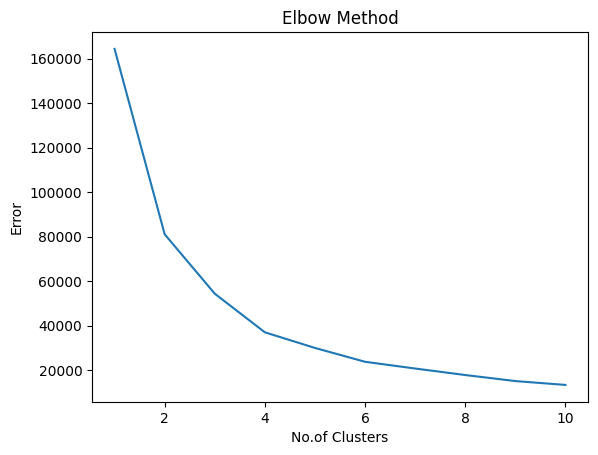

In [28]:
plt.plot(range(1,11),error)
plt.title('Elbow Method')
plt.xlabel('No.of Clusters')
plt.ylabel('Error')

In [29]:
km_model=cluster.KMeans(n_clusters=6,init='k-means++',random_state=0)
km_model.fit(new_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=0)

In [30]:
pred=km_model.predict(new_df)
pred

array([4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 1, 4, 1, 4, 4, 4, 4, 4, 1, 4, 4, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 4, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 4, 4, 1, 4, 4, 1, 1, 1, 1, 3, 5, 3, 3, 5, 3, 3, 3, 5,
       1, 3, 5, 5, 3, 3, 3, 3, 3, 5, 3, 5, 5, 3, 3, 5, 3, 3, 5, 3, 3, 5,
       5, 3, 3, 5, 3, 5, 5, 5, 3, 5, 3, 5, 5, 3, 3, 5, 3, 5, 3, 3, 3, 3,
       3, 5, 5, 5, 5, 5, 3, 3, 3, 3, 5, 2, 2, 2, 5, 2, 2, 2, 3, 2, 2, 2,
       5, 2, 5, 2, 2, 2, 5, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       5, 5], dtype=int32)

In [32]:
df["label"] = pred

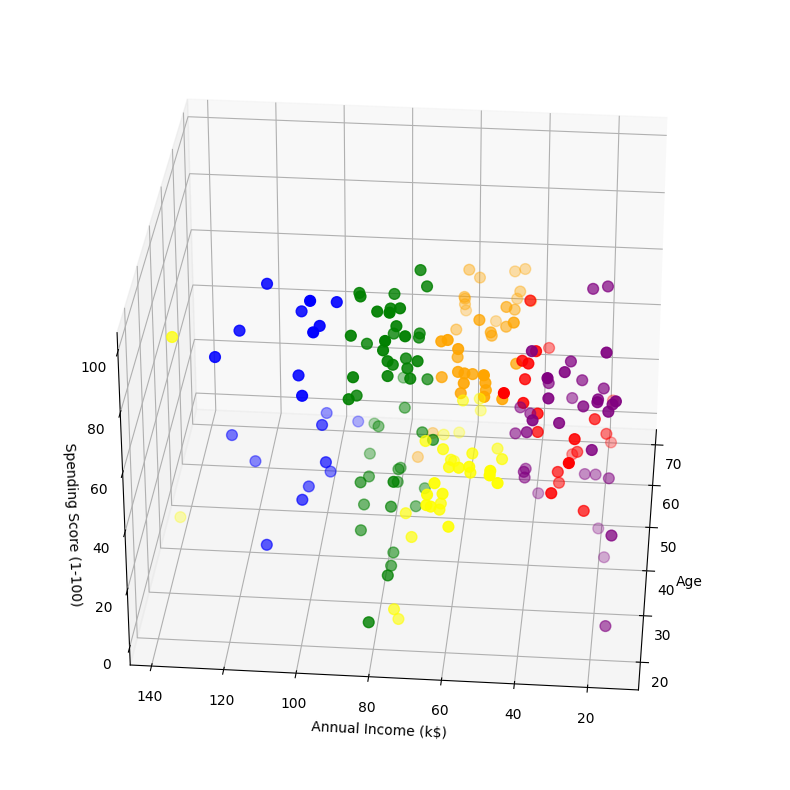

In [36]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.scatter(df.Age[df.label == 5], df["Annual Income (k$)"][df.label == 5], df["Spending Score (1-100)"][df.label == 5], c='yellow', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()